# Esercitazione 6

## Equilibrazione

In questa lezione devo simulare un modello di Ising monomensionale. La simulazione consiste nel calcolare l'energia, il calore specifico, la magnetizzazione e la suscettività a diverse temperature. Prima di fare una simulazione è necessario equilibrare il sistema, per questo ho aggiunto una linea al file input.dat che permette di specificare se voglio fare tutta la simulazione o soltanto controllare l'equilibrazione del sistema. Per determinare quando il sistema ha raggiunto l'equilibrio guardo come varia l'energia del sistema. Controllo il sistema sia con $h = 0$ sia con $h = 0.02$ soltanto alle temperature $T = 0.5$ e $T = 2$, in questo modo controllo tutti i quattro casi estremi. Si verifica che i casi che necessitano più passi Metropolis per arrivare all'equilibrazione sono quelli con $T = 0.5$. Per $T = 0.5$ e $h = 0.02$ si ha il seguente andamento.

In [51]:
import matplotlib.pyplot as plt
import numpy as np

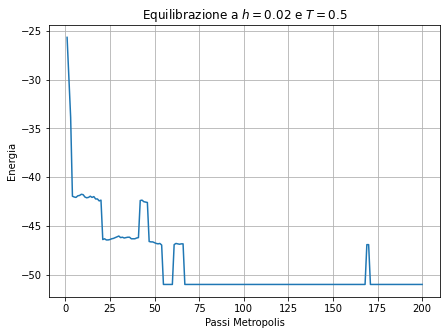

In [65]:
# Carica i dati da file
x_energia, energia = np.loadtxt("../Esercizio6/output.equi", usecols=(0, 1), delimiter = " ", unpack='true')

# Disegna il grafico
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.plot(x_energia, energia)
ax.set_xlabel('Passi Metropolis')
ax.set_ylabel('Energia')
ax.set_title(r"Equilibrazione a $h = 0.02$ e $T = 0.5$")
ax.grid(True)

Dai questi grafici si deduce che l'equilibrazione è molto veloce, ovvero impiega meno di $100$ passi Metropolis. Questo fa si che non ci sia bisogno di controllare per ogni temperatura un numero di passi ottimale per l'equilibrazione, ma posso decidere di equilibrare per $100$ passi ogni volta che devo cambiare una temperatura. Questo ragionamento diventa anche più corretto considerando che una volta finita una temperatura e passando alla successiva, la differenza tra le due configurazioni di equilibrio non è sostanziale e quindi servirà un numero anche minore di passi per ragguingere l'equilibrazione.

## Configurazione precedente e dimensione blocchi

L'esercizio chiedeva di aggiungere la possibilità di ripartire da una configurazione precedente. Anche se ho aggiunto questa possibilità, non la sfrutto perchè mi sembra più comodo fare un ciclo sulle temperature e finita ogni temperatura modificarla linearmente.

Come ultima cosa prima di passare alle simulazioni, devo stabilire quanto devono essere grandi i blocchi. Un passo Metropolis consiste nel provare a girare un numero di spin pari al numero totale nel campione. Questo significa che potenzialmente un singolo passo Metropolis può girare tutti gli spin, di conseguenza mi posso aspettare che qualche passo Metropolis sia sufficiente per ottenere una configurazione indipendente dalla precedente. Blocchi che contengono qualche centinaio o qualche migliaio di passi Metropolis dovrebbe essere abbastanza grandi.

## Simulazioni

Faccio una simulazione utilizzando l'algoritmo di Metropolis e una per quello di Gibbs. In entrambi i metodi la selezione di un determinato spin è casuale su tutta la popolazione, questo implica che questa probabilità di transizione è uniforme e di conseguenza l'accettazione del Metropolis si semplifica. Preso uno spin $s_i$, Metropolis inverte il suo valore con probabilità

$$
p_{flip} = exp\bigg(-2 \beta s_i \big(h + J(s_{i+1} + s_{i-1})\big)\bigg) 
$$

Gibbs invece dato $s_i$ gli assegna il valore $1$ con probabilità

$$
p_{up} = \frac{1}{1+exp\bigg(-2 \beta \big(h + J(s_{i+1} + s_{i-1})\big)\bigg)}
$$

e ovviamente il valore $-1$ con probabilità complementare. Prima di fare le simulazioni plotto l'andamento esatto delle quantità da calcolare. In questo modo successivamente farò soltanto vedere la differenza rispetto alla soluzione esatta. La soluzione esatta può essere calcolata con il seguente specchietto python.

In [66]:
# Dati iniziali
points = 100
T = np.linspace(0.2, 3, num = points)
b = 1 / T
J = 1.0
Ns = 50
h=0.02

# Espressioni per il calcolo
th = np.tanh(J * b)
thN= th**Ns
ch = 1 / th
l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))
Z = l1**Ns + l2**Ns

# Calcolo dei valori esatti
energy = -J * (th + ch * thN) / (1 + thN)
heat = ((J * b)**2) * (((1 + thN + (Ns - 1) * (th**2) + (Ns - 1) * (ch**2) * thN) / (1 + thN)) - Ns * ((th + ch * thN) / (1 + thN))**2)
susce = b * np.exp(2 * b * J) * (1 - thN) / (1 + thN)
magne = (np.exp(b * J) * np.sinh(b * h) * ((l1**(Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))) + (l2**(Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))))) / (Z)

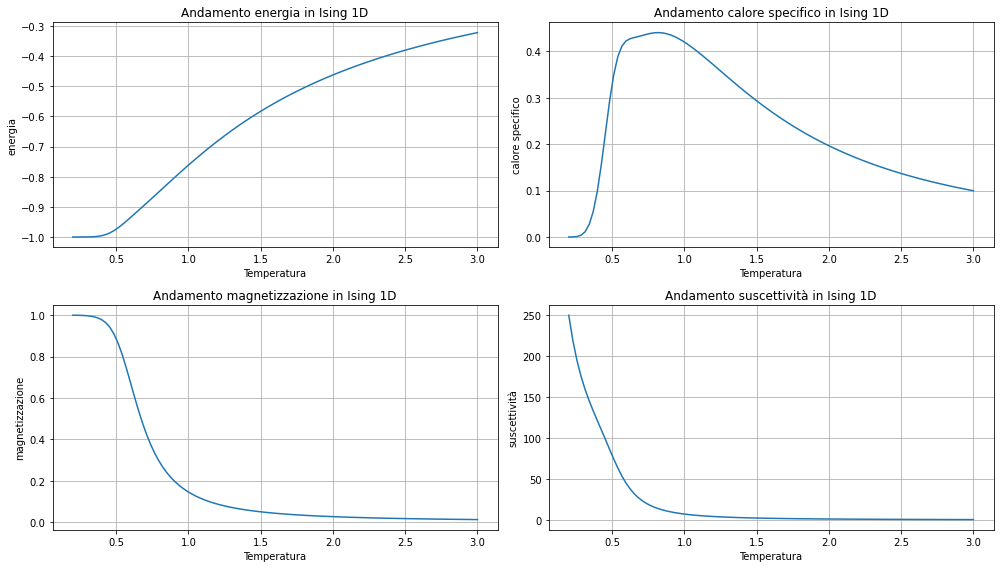

In [67]:
# Prepara quattro immagini
fig, ax = plt.subplots(2, 2, figsize = (14, 8), tight_layout = True)
ax = ax.reshape(-1)

valori = [energy, heat, magne, susce]
nomi = ["energia", "calore specifico", "magnetizzazione", "suscettività"]

for i in range(4):
    ax[i].plot(T, valore[i])
    ax[i].set_xlabel('Temperatura')
    ax[i].set_ylabel(nomi[i])
    ax[i].set_title(f"Andamento {nomi[i]} in Ising 1D")
    ax[i].grid(True)

In [68]:
# Ricalcolo per fare i grafici successivi
points = 31 # Numero di temperature che ho usato nella simulazione
T = np.linspace(0.5, 2, num = points)
b = 1 / T

# Espressioni per il calcolo
th = np.tanh(J * b)
thN= th**Ns
ch = 1 / th
l1 = np.exp(b * J) * np.cosh(b * h) + np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))
l2 = np.exp(b * J) * np.cosh(b * h) - np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))
Z = l1**Ns + l2**Ns

# Calcolo dei valori esatti
energy = -J * (th + ch * thN) / (1 + thN)
heat = ((J * b)**2) * (((1 + thN + (Ns - 1) * (th**2) + (Ns - 1) * (ch**2) * thN) / (1 + thN)) - Ns * ((th + ch * thN) / (1 + thN))**2)
susce = b * np.exp(2 * b * J) * (1 - thN) / (1 + thN)
magne = (np.exp(b * J) * np.sinh(b * h) * ((l1**(Ns - 1)) * (1 + np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))) + (l2**(Ns - 1)) * (1 - np.exp(b * J) * np.cosh(b * h) / np.sqrt(np.exp(2 * b * J) * np.cosh(b * h) * np.cosh(b * h) - 2 * np.sinh(2 * b * J))))) / (Z)

## Energia

Per il calcolo dell'energia ogni passo Metropolis utilizzo la formula

$$
U = - \sum_{i} s_i \big(J s_{i+1} + h\big)
$$

Alla fine del calcolo del valore di un blocco oltre a fare la media su tutti i valori calcolati devo anche dividere per il numero di spin per ottenere il valore dell'energia per spin. La seguente simulazione divide l'intervallo di temperature $[0.5, 2]$ in $31$ valori (ovvero faccio una misura ogni $0.05$). Per ogni temperatura ho utilizzato $20$ blocchi con $2$ $10^4$ passi per blocco. Infine tra una temperatura e la successiva ho utilizzato $100$ passi per raggiungere l'equilibrazione.

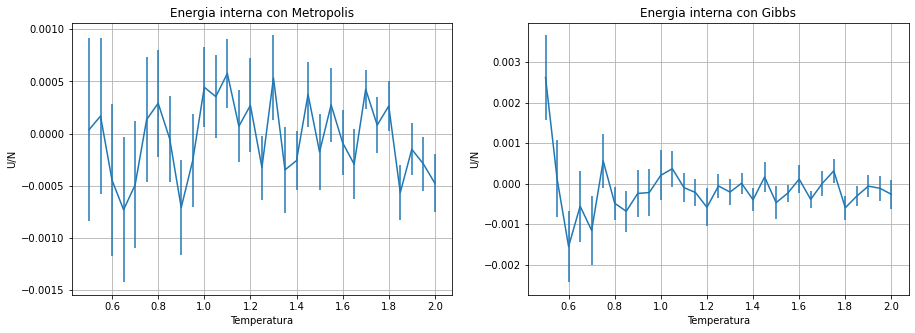

In [110]:
# Carico i dati 
eneM, eneM_err = np.loadtxt("../Esercizio6/output.energia1", usecols=(0,1), delimiter=' ', unpack='true')
eneG, eneG_err = np.loadtxt("../Esercizio6/output.energia0", usecols=(0,1), delimiter=' ', unpack='true')

# Disegno il risultato per Metropolis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.errorbar(T, eneM - energy, yerr = eneM_err)
ax1.set_title('Energia interna con Metropolis')
ax1.set_xlabel('Temperatura')
ax1.set_ylabel('U/N')
ax1.grid(True)

# Disegno il risultato per Gibbs
ax2.errorbar(T, eneG - energy, yerr = eneG_err)
ax2.set_title('Energia interna con Gibbs')
ax2.set_xlabel('Temperatura')
ax2.set_ylabel('U/N')
ax2.grid(True)

I risultati sono in accordo con la previsione teorica e le incertezze ottenute con Metropolis e Gibbs risultano essere comparabili. Nel caso del Metropolis tutti i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 1.7$ che dista $2.3 \sigma$ e la $T = 1.85$ che dista $2.1 \sigma$. Nel caso del Gibbs tutte i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 0.5$ che dista $2.5 \sigma$.

## Calore specifico

Per il calcolo del calore specifico devo utilizzare la formula

$$
C = \frac{k_B\beta^2}{N} \big(\langle H^2 \rangle -\langle H \rangle^2 \big)
$$

dove $H$ è l'energia del sistema. Il valore medio dell'energia già lo calcolo per il valore dell'energia interna, questo significa che ogni passo devo soltanto calcolare in più il quadrato dell'energia. Alla fine di un blocco calcolo le medie, divido per il numero di spin e moltiplico per $\beta^2$ per ottenere una misura del calore specifico. Ovviamente anche in questo caso uso $31$ temperature con $20$ blocchi da $2$ $10^4$ passi.

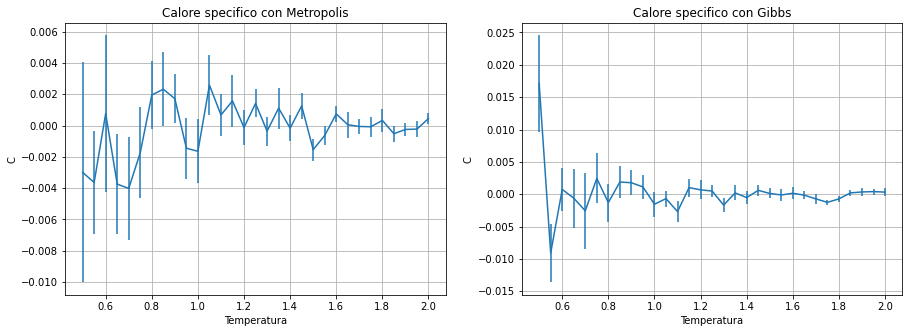

In [111]:
# Carico i dati 
heatM, heatM_err = np.loadtxt("../Esercizio6/output.calore1", usecols=(0,1), delimiter=' ', unpack='true')
heatG, heatG_err = np.loadtxt("../Esercizio6/output.calore0", usecols=(0,1), delimiter=' ', unpack='true')

# Disegno il risultato per Metropolis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.errorbar(T, heatM - heat, yerr = heatM_err)
ax1.set_title('Calore specifico con Metropolis')
ax1.set_xlabel('Temperatura')
ax1.set_ylabel('C')
ax1.grid(True)

# Disegno il risultato per Gibbs
ax2.errorbar(T, heatG - heat, yerr = heatG_err)
ax2.set_title('Calore specifico con Gibbs')
ax2.set_xlabel('Temperatura')
ax2.set_ylabel('C')
ax2.grid(True)

I risultati sono in accordo con la previsione teorica e le incertezze ottenute con Metropolis e Gibbs risultano essere comparabili. Nel caso del Metropolis tutti i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 1.5$ che dista $2.2 \sigma$. Nel caso del Gibbs tutte i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 0.5$ che dista $2.3 \sigma$ e la temperatura $T = 1.75$ che dista $2.9 \sigma$.

## Magnetizzazione

Per il calcolo della magnetizzazione utilizzo ogni passo Metropolis la formula $M = \sum_{i} s_i$. Alla fine del calcolo del valore di un blocco oltre a fare la media su tutti i valori calcolati devo anche dividere per il numero di spin per ottenere il valore corretto della magnetizzazione. Anche per questa simulazione utilizzo $31$ temperature, ognuna con $20$ blocchi da $2$ $10^4$ passi. Questa simulazione è l'unica che viene effettuata con $h = 0.02$, altrimenti non avrei nessuna magnetizzazione.

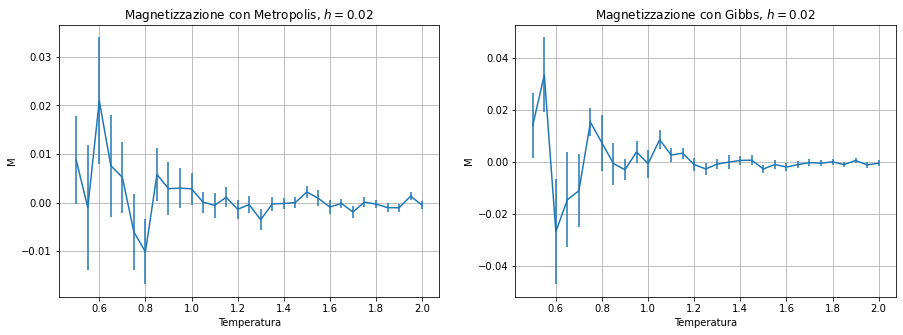

In [116]:
# Carico i dati 
magneM, magneM_err = np.loadtxt("../Esercizio6/output.magne1", usecols=(0,1), delimiter=' ', unpack='true')
magneG, magneG_err = np.loadtxt("../Esercizio6/output.magne0", usecols=(0,1), delimiter=' ', unpack='true')

# Disegno il risultato per Metropolis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.errorbar(T, magneM - magne, yerr = magneM_err)
ax1.set_title('Magnetizzazione con Metropolis, $h = 0.02$')
ax1.set_xlabel('Temperatura')
ax1.set_ylabel('M')
ax1.grid(True)

# Disegno il risultato per Gibbs
ax2.errorbar(T, magneG - magne, yerr = magneG_err)
ax2.set_title('Magnetizzazione con Gibbs, $h = 0.02$')
ax2.set_xlabel('Temperatura')
ax2.set_ylabel('M')
ax2.grid(True)

I risultati sono in accordo con la previsione teorica e le incertezze ottenute con Metropolis e Gibbs risultano essere comparabili. Nel caso del Metropolis tutti i valori ottenuti sono entro le due deviazioni standard. Nel caso del Gibbs tutte i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 0.55$ che dista $2.3 \sigma$, la temperatura $T = 0.75$ che dista $2.8 \sigma$ e la temperatura $T = 1.05$ che dista $2.3 \sigma$.

## Suscettività

Per il calcolo della suscettività sfrutto il fatto che il valore medio della magnetizzazione a campo esterno nullo è zero. In questo modo la formula si riduce a $\chi = \beta \big \langle (\sum_{i} s_i)^2 \big \rangle$. Ogni passo devo calcolare il quadrato della magnetizzazione. Alla fine di un blocco faccio la media, divido per il numero degli spin e moltiplico per l'inverso della temperatura. Anche per questa simulazione utilizzo $31$ temperature, ognuna con $20$ blocchi da $2$ $10^4$ passi.

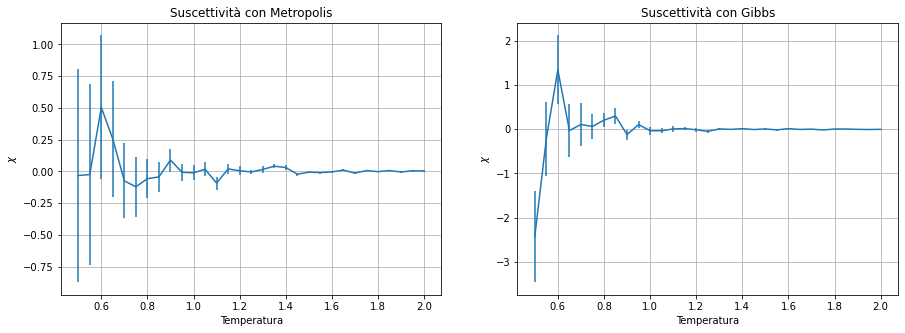

In [120]:
# Carico i dati 
susceM, susceM_err = np.loadtxt("../Esercizio6/output.susce1", usecols=(0,1), delimiter=' ', unpack='true')
susceG, susceG_err = np.loadtxt("../Esercizio6/output.susce0", usecols=(0,1), delimiter=' ', unpack='true')

# Disegno il risultato per Metropolis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.errorbar(T, susceM - susce, yerr = susceM_err)
ax1.set_title('Suscettività con Metropolis')
ax1.set_xlabel('Temperatura')
ax1.set_ylabel('$\chi$')
#ax1.set_xlim(1,2) # Per vedere le ultime incertezze
#ax1.set_ylim(-0.1,0.1) # Per vedere le ultime incertezze
ax1.grid(True)

# Disegno il risultato per Gibbs
ax2.errorbar(T, susceG - susce, yerr = susceG_err)
ax2.set_title('Suscettività con Gibbs')
ax2.set_xlabel('Temperatura')
ax2.set_ylabel('$\chi$')
#ax2.set_xlim(1,2) # Per vedere le ultime incertezze
#ax2.set_ylim(-0.1,0.1) # Per vedere le ultime incertezze
ax2.grid(True)

I risultati sono in accordo con la previsione teorica e le incertezze ottenute con Metropolis e Gibbs risultano essere comparabili. Nel caso del Metropolis tutti i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 1.35$ che dista $2.6 \sigma$. Nel caso del Gibbs tutte i valori ottenuti sono entro le due deviazioni standard tranne la temperatura $T = 0.5$ che dista $2.3 \sigma$.